In [38]:
# multivariate output 1d cnn example
from numpy import array
import numpy as np
import pandas as pd
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
# split a multivariate sequence into samples

In [2]:
# Загружаем датафрейм
frame = pd.read_csv('Gosloto_6x45.csv', header=0, sep=';')
frame



# удвляем дату и тираж
frame = frame.drop(columns=['datetime', 'tiraz'], axis=1).astype(float)
frame

,1-number,2-number,3-number,4-number,5-number,6-number
0,15.0,17.0,22.0,23.0,25.0,33.0
1,23.0,29.0,44.0,19.0,24.0,45.0
2,38.0,7.0,3.0,45.0,26.0,4.0
3,31.0,26.0,44.0,37.0,40.0,27.0
4,16.0,17.0,12.0,21.0,23.0,35.0
...,...,...,...,...,...,...
5424,18.0,7.0,16.0,23.0,37.0,43.0
5425,15.0,13.0,35.0,33.0,34.0,28.0
5426,27.0,44.0,40.0,29.0,41.0,25.0
5427,1.0,10.0,33.0,37.0,40.0,44.0


In [91]:
in_seq1 = frame["1-number"].to_numpy()
in_seq2 = frame["2-number"].to_numpy()
in_seq3 = frame["3-number"].to_numpy()
in_seq4 = frame["4-number"].to_numpy()
in_seq5 = frame["5-number"].to_numpy()
in_seq6 = frame["6-number"].to_numpy()

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
# horizontally stack columns
#dataset = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6))
dataset= np.array(range(0,54,1)).reshape(9,6)

n_input = 3
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=1)


for i in range(len(generator)):
	x_g, y_g = generator[i]
	print('%s => %s' % (x_g, y_g))
generator.length

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]
  [12 13 14 15 16 17]]] => [[18 19 20 21 22 23]]
[[[ 6  7  8  9 10 11]
  [12 13 14 15 16 17]
  [18 19 20 21 22 23]]] => [[24 25 26 27 28 29]]
[[[12 13 14 15 16 17]
  [18 19 20 21 22 23]
  [24 25 26 27 28 29]]] => [[30 31 32 33 34 35]]
[[[18 19 20 21 22 23]
  [24 25 26 27 28 29]
  [30 31 32 33 34 35]]] => [[36 37 38 39 40 41]]
[[[24 25 26 27 28 29]
  [30 31 32 33 34 35]
  [36 37 38 39 40 41]]] => [[42 43 44 45 46 47]]
[[[30 31 32 33 34 35]
  [36 37 38 39 40 41]
  [42 43 44 45 46 47]]] => [[48 49 50 51 52 53]]


3

In [54]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	print(len(sequences))
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			print('!')
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
# choose a number of time steps
n_steps = 6
# convert into input/output
X, y = split_sequences(dataset, n_steps)

5429
!


In [92]:
x_val = array([[[36 ,37, 38, 39, 40, 41], [42, 43, 44, 45, 46, 47], [48, 49, 50, 51, 52, 53]]])
y_val = array( [[54, 55, 56, 57, 58, 59]])

In [99]:
# the dataset knows the number of features, e.g. 2
#n_features = X.shape[2]
n_features = 6
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='linear', input_shape=(3, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='linear'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
#model.fit(X, y, epochs=3, verbose=1)
history = model.fit_generator(generator, epochs=170, verbose=1,validation_data=(x_val, y_val))
print("Ok!")
# demonstrate prediction

Epoch 1/170
6/6 [==============================] - 0s 18ms/step - loss: 934.5814 - val_loss: 877.8207
Epoch 2/170
6/6 [==============================] - 0s 3ms/step - loss: 201.7952 - val_loss: 72.7921
Epoch 3/170
6/6 [==============================] - 0s 4ms/step - loss: 48.8716 - val_loss: 281.5025
Epoch 4/170
6/6 [==============================] - 0s 4ms/step - loss: 66.5019 - val_loss: 230.3528
Epoch 5/170
6/6 [==============================] - 0s 4ms/step - loss: 45.7965 - val_loss: 86.1228
Epoch 6/170
6/6 [==============================] - 0s 4ms/step - loss: 18.5881 - val_loss: 25.3405
Epoch 7/170
6/6 [==============================] - 0s 4ms/step - loss: 14.6176 - val_loss: 18.3891
Epoch 8/170
6/6 [==================

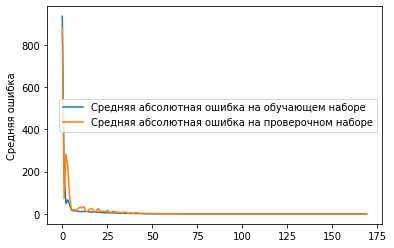

In [100]:
plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [101]:
x_input = array([[70,71,72,73,74,75], [76,77,78,79,80,81], [82,83,84,85,86,87]])
x_input = x_input.reshape((1, 3, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[87.99998  89.00007  90.000015 91.00001  92.00003  93.00005 ]]
